## Exercício - Análise de Poço por Curvas de Declínio

*Baseado no Exemplo 11.1 do livro [Engenharia de Reservatórios de Petróleo](http://www.saraiva.com.br/engenharia-de-reservatorios-de-petroleo-198191.html)*

Dado o histórico de produção de um poço na tabela abaixo:

| *t (ano)* | *q (m³std/d)* |
|-----------|---------------|
| 0         | 100           |
| 1         | 77.0          |
| 2         | 64.0          |
| 3         | 49.5          |
| 4         | 41.0          |
| 5         | 34.5          |

Considerando uma vazão de abandono de 5 m³std/d, determinar, através de análise de curva de declínio:

 1. Tempo de abandono;
 1. Produção acumulada até o abandono.

### Solução:

Utilizando a Análise de Curvas de Declínio, a vazão $q$ de um poço no tempo $t$ pode ser dada por

$$q = \frac{q_i}{(1 + n a_i t)^{1/n}}$$

Podemos escrever esta equação em Python da seguinte forma:

In [87]:
def well_flow(t, qi, ai, n):
    '''
    Calculate well flow rate using decline curve analysis
    '''
    return qi / (1 + n * ai * t) ** (1 / n)

In [88]:
import numpy as np
import matplotlib
%matplotlib inline

In [91]:
# Define history data
t = np.arange(6)
history_q = np.array([100, 77, 61, 49.5, 41, 34.5])

Vamos plotar a uma curva de declíneo qualquer, só para ver seu funcionamento

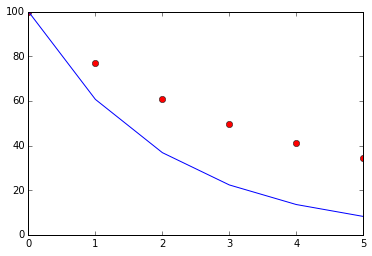

In [97]:
plot.plot(t, history_q, "ro")
plot.plot(t, well_flow(t, 100, 0.5, 1e-3))

Usaremos a função [curve_fit](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.curve_fit.html) da **SciPy** para encontrar os parâmetros da curva de declínio:

In [113]:
from scipy.optimize import curve_fit

params, fitted = curve_fit(well_flow, t, history_q, p0=[100, 0.5, 0.3])
print(params)

[ 100.0120758     0.27952672    0.48942488]


Assim, os parâmetros da nossa curva de declínio são:

$$q_i = 100.012, a_i = 0.279, n = 0.489$$

Plotando contra os dados de histórico, temos:

(0, 100)

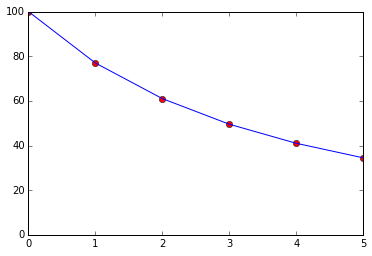

In [114]:
plot.plot(t, history_q, "ro")
plot.plot(t, well_flow(t, params[0], params[1], params[2]))
plot.ylim(0, 100)

Para encontrar o tempo de abandono, temos que achar $t$ em:

$$5 = \frac{100.012}{(1 + 0.489\times0.279 t)^{1/0.489}}$$

Para encontrar o tempo de abandono, ao invés de isolar a variável $t$, vamos tentar encontrar a raiz da equação:

$$0 = \frac{100.012}{(1 + 0.489\times0.279 t)^{1/0.489}} - 5$$

Uaremos a função [root](http://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/optimize.html#root-finding) da **SciPy** para este fim. 

In [112]:
from scipy.optimize import root

objfunc = lambda x: well_flow(x, params[0], params[1], params[2]) - 5
sol = root(objfunc, 10)
print(sol.x)

[ 24.36224975]


Tempo de Abandono é de **24.4 anos**

A produção acumulada até o abandono pode ser calculada integrando-se o a função de declíneo. Para isso vamos usar a função [quad](http://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/integrate.html#general-integration-quad).

In [116]:
from scipy.integrate import quad

result, erquad(well_flow, 0, sol.x, (params[0], params[1], params[2]))

(548.9611704832541, 7.287101512062888e-06)

In [66]:
history_data = np.arange(6) * 365, np.array([100, 77, 61, 49.5, 41, 34.5])

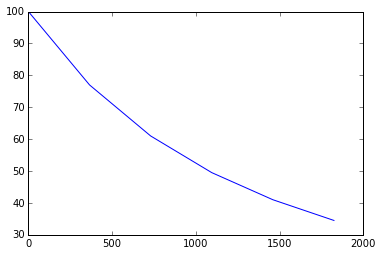

In [67]:
plot.plot(*history_data)